 # **GİRİŞ**

*Bu çalışmada "Biomechanical features of orthopedic patients" veriseti kullanılarak Logistic Regression, KNN, SVM,Naive Bayes, Decision Tree ve  Random Forest sınıflandırıcıları karşılaştırılmıştır.*

Sırasıyla şu adımlar izlenmiştir;
* Kütüphanelerin İmport Edilmesi.
* Verisetinin Alınması.
* Verisetinin İncelenmesi.
* Veri İçerisinden Özellikler İle Etiketlerin Çıkartılması Ve Etiketlerin İnteger Değer Olarak Belirtilmesi.
* Normalizasyon İşlemi.
* Verinin Eğitim Ve Test Verisi Olarak Ayrılması.
* KNN Modelinin Kurulması Ve Test Edilmesi.
* Naive Bayes Modelinin Kurulması Ve Test Edilmesi.
* SVM Modelinin Kurulması Ve Test Edilmesi.
* Decision Tree Modelinin Kurulması Ve Test Edilmesi.
* Random Forest Modelinin Kurulması Ve Test Edilmesi.
* Logistic Regression Modelinin Kurulması Ve Test Edilmesi.
* Performansların Karşılaştırılması.

**ADIM 1: Kütüphanelerin İmport Edilmesi.**

In [1]:
# Kütüphaneler import ediliyor..
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import os

**ADIM 2: Verisetinin Alınması.**

In [2]:
# Veriseti alındı..
data = pd.read_csv('column_2C_weka.csv')

**ADIM 3: Verisetinin İncelenmesi. **

In [3]:
# Verisetinin içeriğinden küçük bir kısım aşağıda görülmektedir.
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
data.describe()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**ADIM 4:  Veri İçerisinden Özellikler İle Etiketlerin Çıkartılması Ve Etiketlerin İnteger Değer Olarak Belirtilmesi.**

In [6]:
#%% Veri sayısal olarak ifade ediliyor.

data.loc[:,'class'] = [1 if each == 'Normal' else 0 for each in data.loc[:,'class'] ]
Labels = data.loc[:,'class']

x = data.drop(["class"],axis = 1)


**ADIM 5: Normalizasyon İşlemi.**

In [7]:
#%% Normalizasyon..
x_norm = (x - np.min(x))/(np.max(x) - np.min(x))

print("NORMALİZASYON İŞLEMİ ÖNCESİ:",
      "\nMin :")
print(np.min(x))
print("\nMax :")
print(np.max(x))


print("\n\nNORMALİZASYON İŞLEMİ SONRASI:",
      "\nMin :")
print(np.min(x_norm))
print("\nMax :")
print(np.max(x_norm))

NORMALİZASYON İŞLEMİ ÖNCESİ: 
Min :
pelvic_incidence            26.147921
pelvic_tilt numeric         -6.554948
lumbar_lordosis_angle       14.000000
sacral_slope                13.366931
pelvic_radius               70.082575
degree_spondylolisthesis   -11.058179
dtype: float64

Max :
pelvic_incidence            129.834041
pelvic_tilt numeric          49.431864
lumbar_lordosis_angle       125.742385
sacral_slope                121.429566
pelvic_radius               163.071041
degree_spondylolisthesis    418.543082
dtype: float64


NORMALİZASYON İŞLEMİ SONRASI: 
Min :
pelvic_incidence            0.0
pelvic_tilt numeric         0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
dtype: float64

Max :
pelvic_incidence            1.0
pelvic_tilt numeric         1.0
lumbar_lordosis_angle       1.0
sacral_slope                1.0
pelvic_radius               1.0
degree_spondylolisthesis    1.0
dtype: float64


**ADIM 6: Verinin Eğitim ve Test Verisi Olarak Ayrılması.**

In [8]:
#%% Veri Eğitim ve Test verisi olarak ayrıldı..
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, Labels, test_size = 0.3, random_state = 1)


In [9]:
# Daha sonra sınıflandırıcıları karşılaştrırken kullanılacak score değerlerini tutması için liste oluşturuldu.
SCORES = []

**ADIM 7:  KNN Modelinin Kurulması Ve Test Edilmesi.**

![](https://upload.wikimedia.org/wikipedia/commons/e/e5/KNN_detec.JPG)
***Kaynak : https://upload.wikimedia.org/wikipedia/commons/e/e5/KNN_detec.JPG***

K-Nearest Neighbors (K-En Yakın Komşu) algoritması şu şekilde işler;
* Test noktası seçilir.
* Diğer tüm noktalar için test noktasına olan uzaklıklar hesaplanır.
* En yakın "K" tane nokta bulunur.
* Bu "K" tane noktanın etiketine bakılarak test noktası sınıflandırılır. Örneğin yukarıdaki resimde k=3'tür ve bu 3 komşunun 2 tanesi ikinci sınıfa, 1 tanesi birici sınıfa aittir. Dolayısıyla test noktası için "ikinci sınıfa aittir" diyebiliriz.

In [10]:
#%% KNN Modeli
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("Accuracy of Naive Bayes algorithm: ",knn.score(x_test, y_test))


Accuracy of Naive Bayes algorithm:  0.7419354838709677


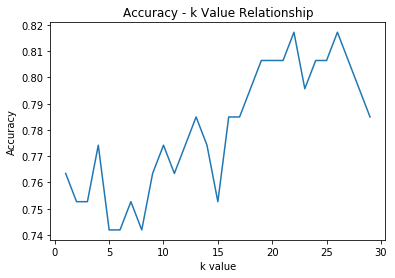

Max. Accurancy is  0.8172043010752689 
k value is : 21


In [11]:
# Uygun k değerinin seçilmesi
score_list = []
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1, 30), score_list)
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Accuracy - k Value Relationship")
plt.show()

print("Max. Accurancy is ",np.max(score_list),"\nk value is :", score_list.index(np.max(score_list)))
SCORES.append(["KNN",np.max(score_list)])

**ADIM 8: Naive Bayes Modelinin Kurulması Ve Test Edilmesi**

In [12]:
# %% Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
# test
acc_nb = nb.score(x_test,y_test)
print("Accuracy of Naive Bayes algorithm: ",acc_nb)
SCORES.append(["NB",acc_nb])


Accuracy of Naive Bayes algorithm:  0.8172043010752689


**ADIM 9: SVM Modelinin Kurulması Ve Test Edilmesi**

In [13]:
# %% SVM
 
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
 
#  test
acc_svm = svm.score(x_test,y_test)
print("Accuracy of SVM algorithm: ",acc_svm)
SCORES.append(["SVM",acc_svm])
 

Accuracy of SVM algorithm:  0.6881720430107527


**ADIM 10: Decision Tree Modelinin Kurulması Ve Test Edilmesi**

In [14]:
#%% Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

acc_dt = dt.score(x_test,y_test)
print("Accuracy of Decision Tree algorithm: ",acc_dt ) 
SCORES.append(["DT",acc_dt])

Accuracy of Decision Tree algorithm:  0.7849462365591398


**ADIM 11: Random Forest Modelinin Kurulması Ve Test Edilmesi.**

In [15]:
#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)

acc_rf = rf.score(x_test,y_test)
print("Accuracy of Random Forest algorithm: ",acc_rf)
SCORES.append(["RF",acc_rf])

Accuracy of Random Forest algorithm:  0.8602150537634409


**ADIM 12: Logistic Regression Modelinin Kurulması Ve Test Edilmesi.**

In [16]:
#%% Logistic Regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

acc_lr = lr.score(x_test,y_test)
print("Accuracy of Logistic Regression algorithm: ",acc_lr)
SCORES.append(["LReg.",acc_lr])

Accuracy of Logistic Regression algorithm:  0.7526881720430108


**ADIM 13: Performansların Karşılaştırılması.**

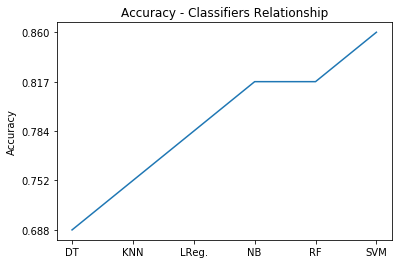

In [17]:
# Sınıflandırıcıların Performanslarına bakıldığında SVM'in en yüksek başarıya sahip olduğunu
# görüyoruz.Decision Tree ise en düşük başarıya sahiptir.
SCORES = np.array(SCORES)
SCORES.sort(axis=0)

r,c = SCORES.shape
for idx in range(0, r):
    SCORES[idx,1] = '{:.5s}'.format(SCORES[idx,1])

plt.plot(SCORES[:,0],SCORES[:,1])
plt.ylabel("Accuracy")
plt.title("Accuracy - Classifiers Relationship")
plt.show()
